<a href="https://colab.research.google.com/github/vishakaKangude/Machine-Learning-Project/blob/main/Loan_Approva_predictionl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [ ]:

df = pd.read_csv('train.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:

df.fillna(method='ffill', inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col != 'Loan_ID':
        df[col] = le.fit_transform(df[col])

df.head()


<ipython-input-6-c092ac350bfe>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:

X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:

your_data = {
    'Gender': [1],
    'Married': [1],
    'Dependents': [0],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [0],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': [2]
}

your_input_df = pd.DataFrame(your_data)


✅ Accuracy: 0.7886178861788617

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.77      0.96      0.86        80

    accuracy                           0.79       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.79      0.77       123



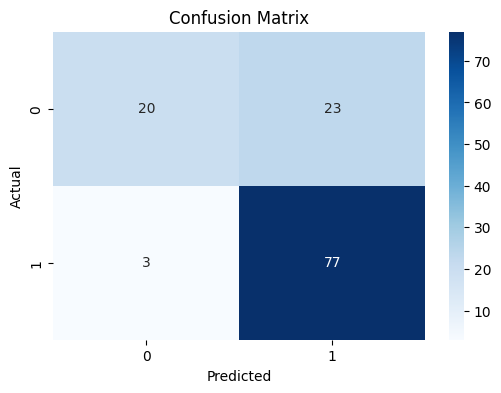

In [ ]:

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

your_data = {
    'Gender': [1],
    'Married': [1],
    'Dependents': [0],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [0],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': [2]
}
your_input_df = pd.DataFrame(your_data)


In [ ]:
your_prediction = model.predict(your_input_df)
if your_prediction[0] == 1:
    print("🎉 Congrats Vishaka! Your loan is likely to be APPROVED.")
else:
    print("❌ Sorry Vishaka, your loan is likely to be REJECTED.")


🎉 Congrats Vishaka! Your loan is likely to be APPROVED.


In [ ]:

your_data = {
    'Gender': [1],
    'Married': [0],
    'Dependents': [0],
    'Education': [1],
    'Self_Employed': [1],
    'ApplicantIncome': [1500],
    'CoapplicantIncome': [0],
    'LoanAmount': [200],
    'Loan_Amount_Term': [360],
    'Credit_History': [0],
    #	0 = Rural, 1 = Semiurban, 2 = Urban
    'Property_Area': [0]
}

your_input_df = pd.DataFrame(your_data)

your_prediction = model.predict(your_input_df)
if your_prediction[0] == 1:
    print("🎉 Congrats! Your loan is likely to be APPROVED.")
else:
    print("❌ Sorry! Your loan is likely to be REJECTED.")


❌ Sorry! Your loan is likely to be REJECTED.


In [ ]:
your_data = {
    'Gender': [1],
    'Married': [1],
    'Dependents': [0],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [0],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': [2]
}
your_input_df = pd.DataFrame(your_data)


In [ ]:
your_prediction = model.predict(your_input_df)
if your_prediction[0] == 1:
    print("🎉 Congrats Vishaka! Your loan is likely to be APPROVED.")
else:
    print("❌ Sorry Vishaka, your loan is likely to be REJECTED.")

🎉 Congrats Vishaka! Your loan is likely to be APPROVED.


In [ ]:
your_data = {
    'Gender': [1],
    'Married': [0],
    'Dependents': [0],
    'Education': [1],
    'Self_Employed': [1],
    'ApplicantIncome': [1500],
    'CoapplicantIncome': [0],
    'LoanAmount': [200],
    'Loan_Amount_Term': [360],
    'Credit_History': [0],
    'Property_Area': [0]
}

your_input_df = pd.DataFrame(your_data)

your_prediction = model.predict(your_input_df)
if your_prediction[0] == 1:
    print("🎉 Congrats! Your loan is likely to be APPROVED.")
else:
    print("❌ Sorry! Your loan is likely to be REJECTED.")


❌ Sorry! Your loan is likely to be REJECTED.
